<a href="https://colab.research.google.com/github/leathorm/Interview/blob/main/Model_Assignment_Interview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_excel('/content/Company Y_base_data corresponding to assignment of applicant.xlsx')

##Basic Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Employee_ID             468 non-null    int64         
 1   Start_Month             468 non-null    datetime64[ns]
 2   Stop_Month              149 non-null    datetime64[ns]
 3   Gender                  468 non-null    object        
 4   Birth_Date              468 non-null    datetime64[ns]
 5   Department              468 non-null    object        
 6   Salary_Scale            468 non-null    int64         
 7   Salary                  468 non-null    int64         
 8   Type_of_Contract        468 non-null    object        
 9   Emotional_Stability     466 non-null    float64       
 10  Extraversion            466 non-null    float64       
 11  Openness                466 non-null    float64       
 12  Agreeableness           466 non-null    float64   

In [4]:
missing_values = df.isnull().sum()
print(missing_values)

Employee_ID                 0
Start_Month                 0
Stop_Month                319
Gender                      0
Birth_Date                  0
Department                  0
Salary_Scale                0
Salary                      0
Type_of_Contract            0
Emotional_Stability         2
Extraversion                2
Openness                    2
Agreeableness               2
Reliability                 2
Assessment_Score            0
Distance_Work_KM            0
Work_Engagement             0
Performance_Assessment      0
dtype: int64


In [5]:
# Define the columns with missing values
columns_with_missing_values = [
    'Emotional_Stability',
    'Extraversion',
    'Openness',
    'Agreeableness',
    'Reliability'
]

# Fill missing values in the specified columns with 0
df[columns_with_missing_values] = df[columns_with_missing_values].fillna(0)

In [6]:
# Calculate the duration of employment in days and convert to months
df['Employment_Duration'] = (df['Stop_Month'] - df['Start_Month']).dt.days // 30

df.head()

,Employee_ID,Start_Month,Stop_Month,Gender,Birth_Date,Department,Salary_Scale,Salary,Type_of_Contract,Emotional_Stability,Extraversion,Openness,Agreeableness,Reliability,Assessment_Score,Distance_Work_KM,Work_Engagement,Performance_Assessment,Employment_Duration
0,1010259,2015-06-28,2016-03-28,M,1983-04-29,Operations,2,34725,Permanent,7.0,7.0,6.0,8.0,4.0,6.0,50,1.0,1,9.0
1,1010694,2016-03-28,2016-03-28,F,1985-03-11,Operations,2,30125,Permanent,2.0,7.0,7.0,6.0,2.0,3.0,65,1.4,2,0.0
2,1010399,2015-09-28,2016-04-28,M,1962-05-28,Operations,5,104420,Permanent,9.0,9.0,3.0,4.0,6.0,7.4,37,1.0,2,7.0
3,1010512,2015-11-28,2016-04-28,M,1985-04-10,Operations,2,37475,Permanent,1.0,9.0,8.0,1.0,3.0,6.0,66,1.4,9,5.0
4,1010528,2015-12-28,2016-04-28,F,1987-07-31,Operations,2,32935,Permanent,6.0,8.0,9.0,7.0,3.0,1.0,55,1.3,6,4.0


In [7]:
# Reference date
reference_date = pd.to_datetime('2020-08-01')

# Function to calculate age
def calculate_age(birth_date, reference_date):
    age = reference_date.year - birth_date.year - ((reference_date.month, reference_date.day) < (birth_date.month, birth_date.day))
    return age

# Calculate age and store in a new column
df['Age'] = df['Birth_Date'].apply(lambda x: calculate_age(x, reference_date))

df.head()

,Employee_ID,Start_Month,Stop_Month,Gender,Birth_Date,Department,Salary_Scale,Salary,Type_of_Contract,Emotional_Stability,Extraversion,Openness,Agreeableness,Reliability,Assessment_Score,Distance_Work_KM,Work_Engagement,Performance_Assessment,Employment_Duration,Age
0,1010259,2015-06-28,2016-03-28,M,1983-04-29,Operations,2,34725,Permanent,7.0,7.0,6.0,8.0,4.0,6.0,50,1.0,1,9.0,37
1,1010694,2016-03-28,2016-03-28,F,1985-03-11,Operations,2,30125,Permanent,2.0,7.0,7.0,6.0,2.0,3.0,65,1.4,2,0.0,35
2,1010399,2015-09-28,2016-04-28,M,1962-05-28,Operations,5,104420,Permanent,9.0,9.0,3.0,4.0,6.0,7.4,37,1.0,2,7.0,58
3,1010512,2015-11-28,2016-04-28,M,1985-04-10,Operations,2,37475,Permanent,1.0,9.0,8.0,1.0,3.0,6.0,66,1.4,9,5.0,35
4,1010528,2015-12-28,2016-04-28,F,1987-07-31,Operations,2,32935,Permanent,6.0,8.0,9.0,7.0,3.0,1.0,55,1.3,6,4.0,33


In [8]:
df.describe()

,Employee_ID,Start_Month,Stop_Month,Birth_Date,Salary_Scale,Salary,Emotional_Stability,Extraversion,Openness,Agreeableness,Reliability,Assessment_Score,Distance_Work_KM,Work_Engagement,Performance_Assessment,Employment_Duration,Age
count,4.680000e+02,468,149,468,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,149.000000,468.000000
mean,1.010971e+06,2016-08-04 18:58:27.692307712,2019-02-17 07:43:53.557047040,1981-09-22 05:10:46.153846144,2.455128,46334.391026,4.985043,5.425214,5.021368,5.023504,5.589744,5.751709,26.993590,3.777564,5.493590,33.892617,38.376068
min,1.000102e+06,2015-01-28 00:00:00,2016-03-28 00:00:00,1948-07-23 00:00:00,1.000000,11430.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,28.000000
25%,1.010542e+06,2016-01-28 00:00:00,2017-12-28 00:00:00,1980-01-08 12:00:00,2.000000,35675.000000,3.000000,3.000000,3.000000,3.000000,4.000000,5.000000,7.500000,2.200000,4.000000,24.000000,34.000000
50%,1.010974e+06,2016-09-28 00:00:00,2019-12-28 00:00:00,1984-01-23 12:00:00,2.000000,38155.000000,5.000000,6.000000,5.000000,5.000000,6.000000,6.000000,30.000000,4.000000,6.000000,37.000000,36.000000
75%,1.011352e+06,2017-01-28 00:00:00,2020-04-28 00:00:00,1986-06-11 00:00:00,3.000000,50658.750000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,43.000000,5.000000,7.000000,47.000000,40.000000
max,1.036131e+06,2017-12-28 00:00:00,2020-07-28 00:00:00,1991-10-21 00:00:00,5.000000,160185.000000,9.000000,9.000000,9.000000,9.000000,9.000000,8.000000,66.000000,6.000000,9.000000,62.000000,72.000000
std,1.433928e+03,NaN,NaN,NaN,0.853332,19570.128293,2.616410,2.501555,2.580518,2.564267,2.361010,1.492414,19.878161,1.551537,2.266496,16.208582,7.081328


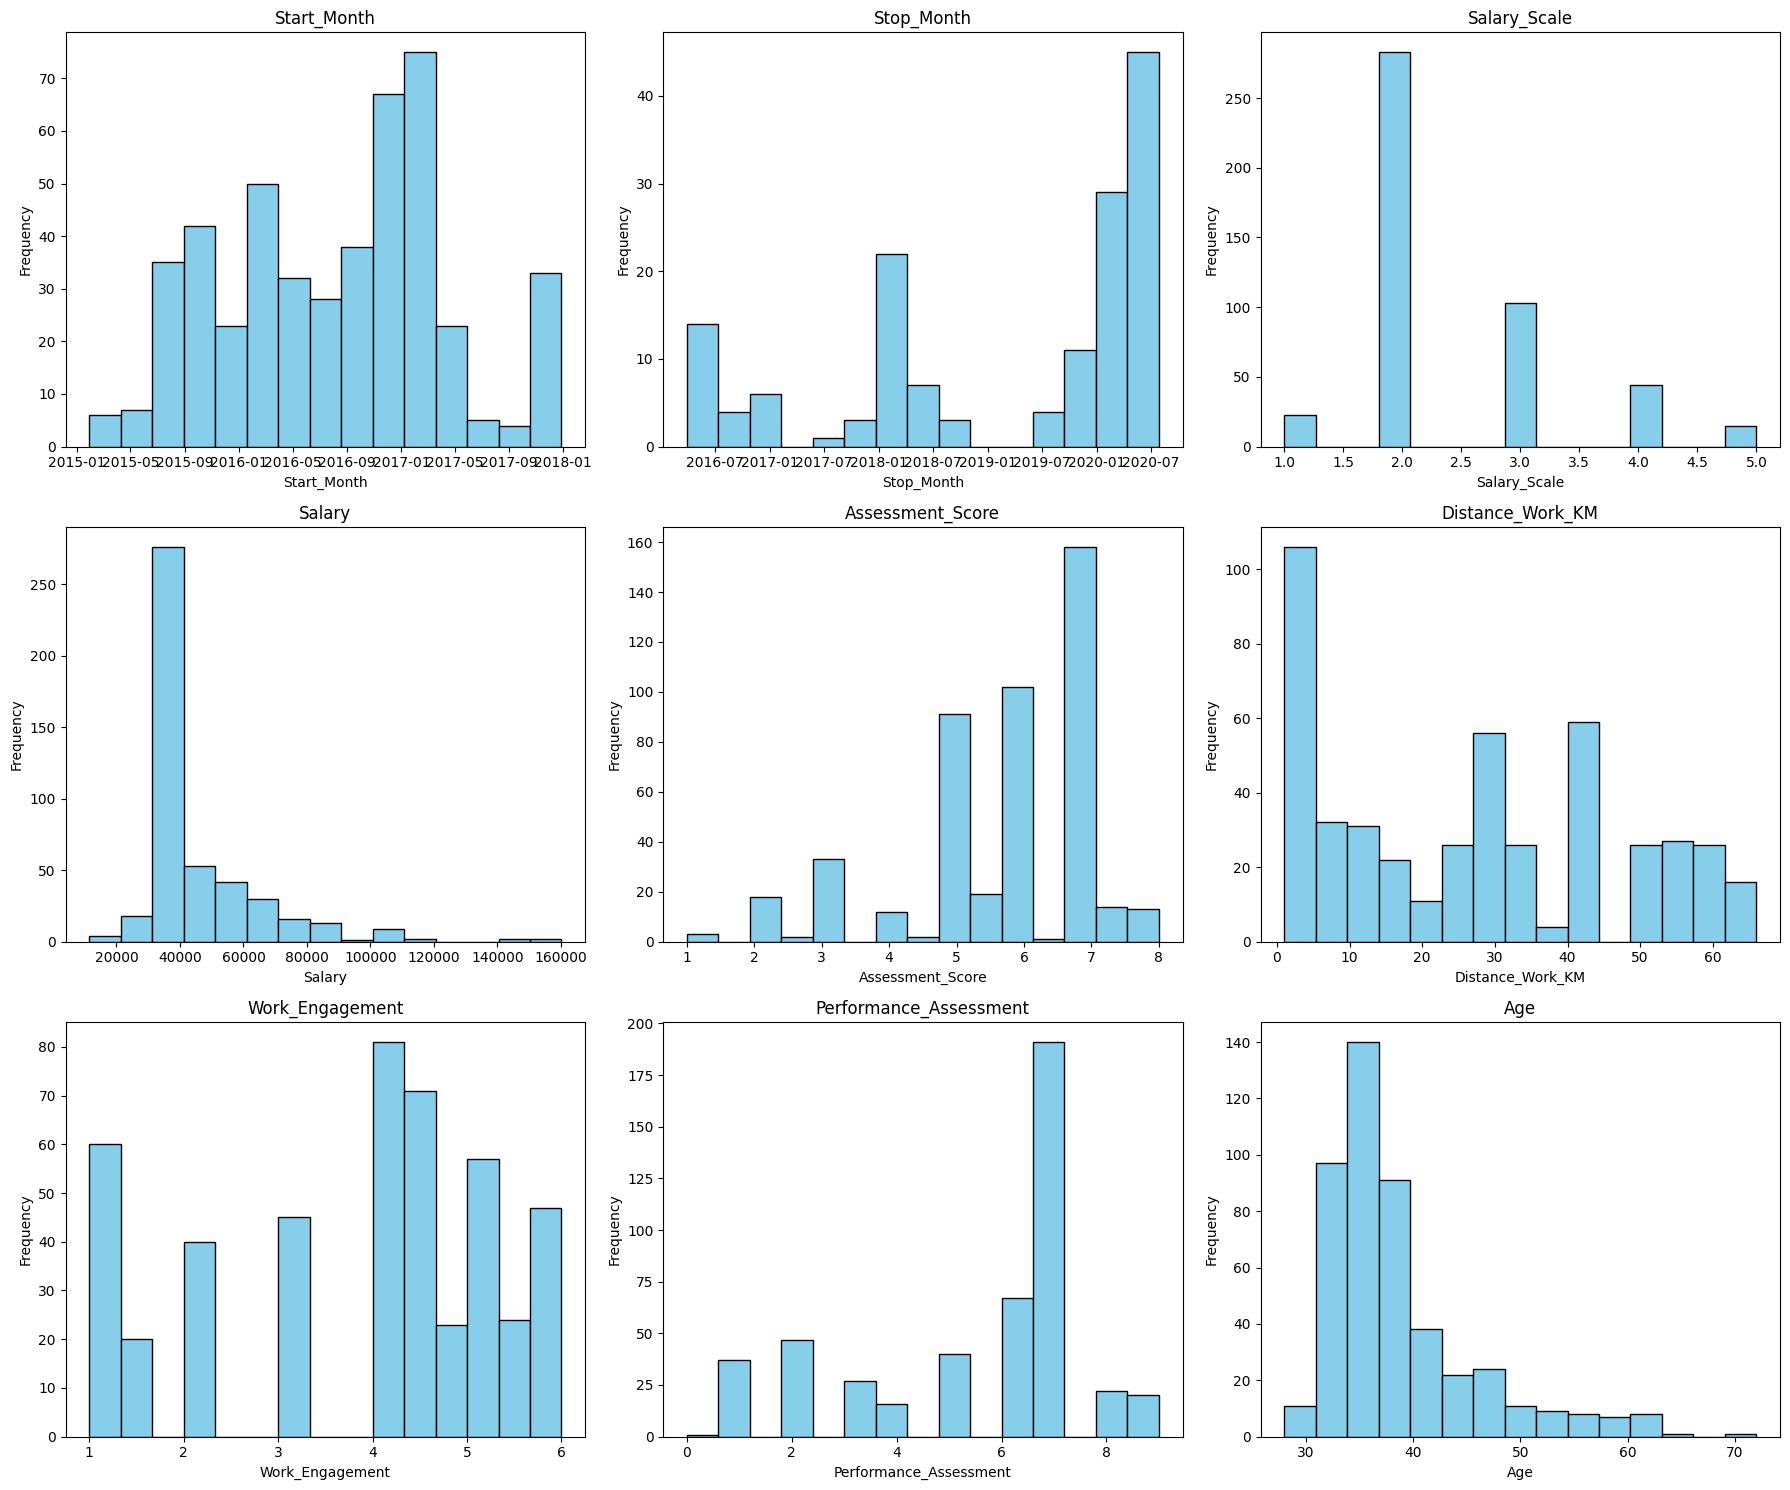

In [9]:
# List of columns you want to plot
columns_to_plot = [
    'Start_Month', 'Stop_Month', 'Salary_Scale', 'Salary',
    'Assessment_Score', 'Distance_Work_KM', 'Work_Engagement', 'Performance_Assessment', 'Age'
]

# Define the layout for the subplots
n_cols = 3
n_rows = len(columns_to_plot) // n_cols + (len(columns_to_plot) % n_cols > 0)

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 15))
axes = axes.flatten()

# Plot each histogram in a subplot
for i, column in enumerate(columns_to_plot):
    axes[i].hist(df[column], bins=15, color='skyblue', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'Emotional_Stability'}>,
        <Axes: title={'center': 'Extraversion'}>],
       [<Axes: title={'center': 'Openness'}>,
        <Axes: title={'center': 'Agreeableness'}>],
       [<Axes: title={'center': 'Reliability'}>, <Axes: >]], dtype=object)

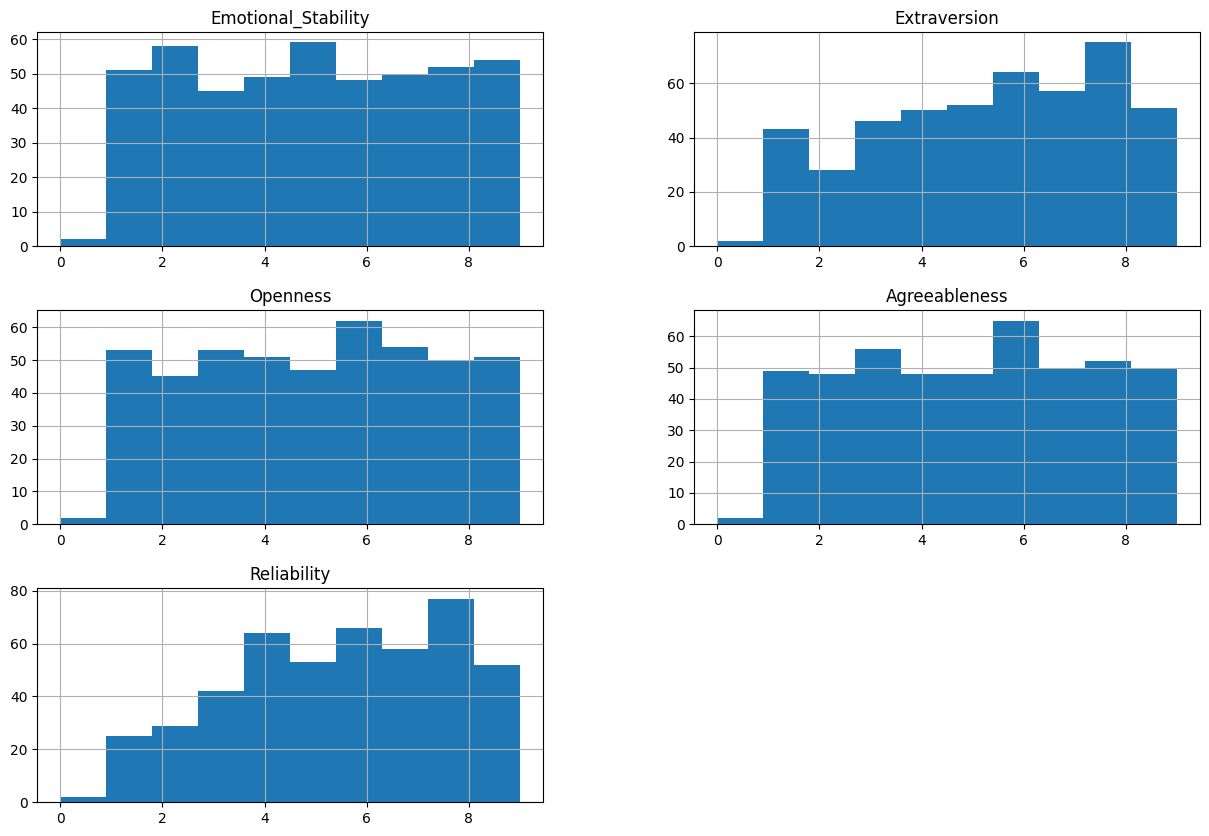

In [10]:
personality_traits = ['Emotional_Stability', 'Extraversion', 'Openness', 'Agreeableness', 'Reliability']
df[personality_traits].hist(figsize=(15, 10))

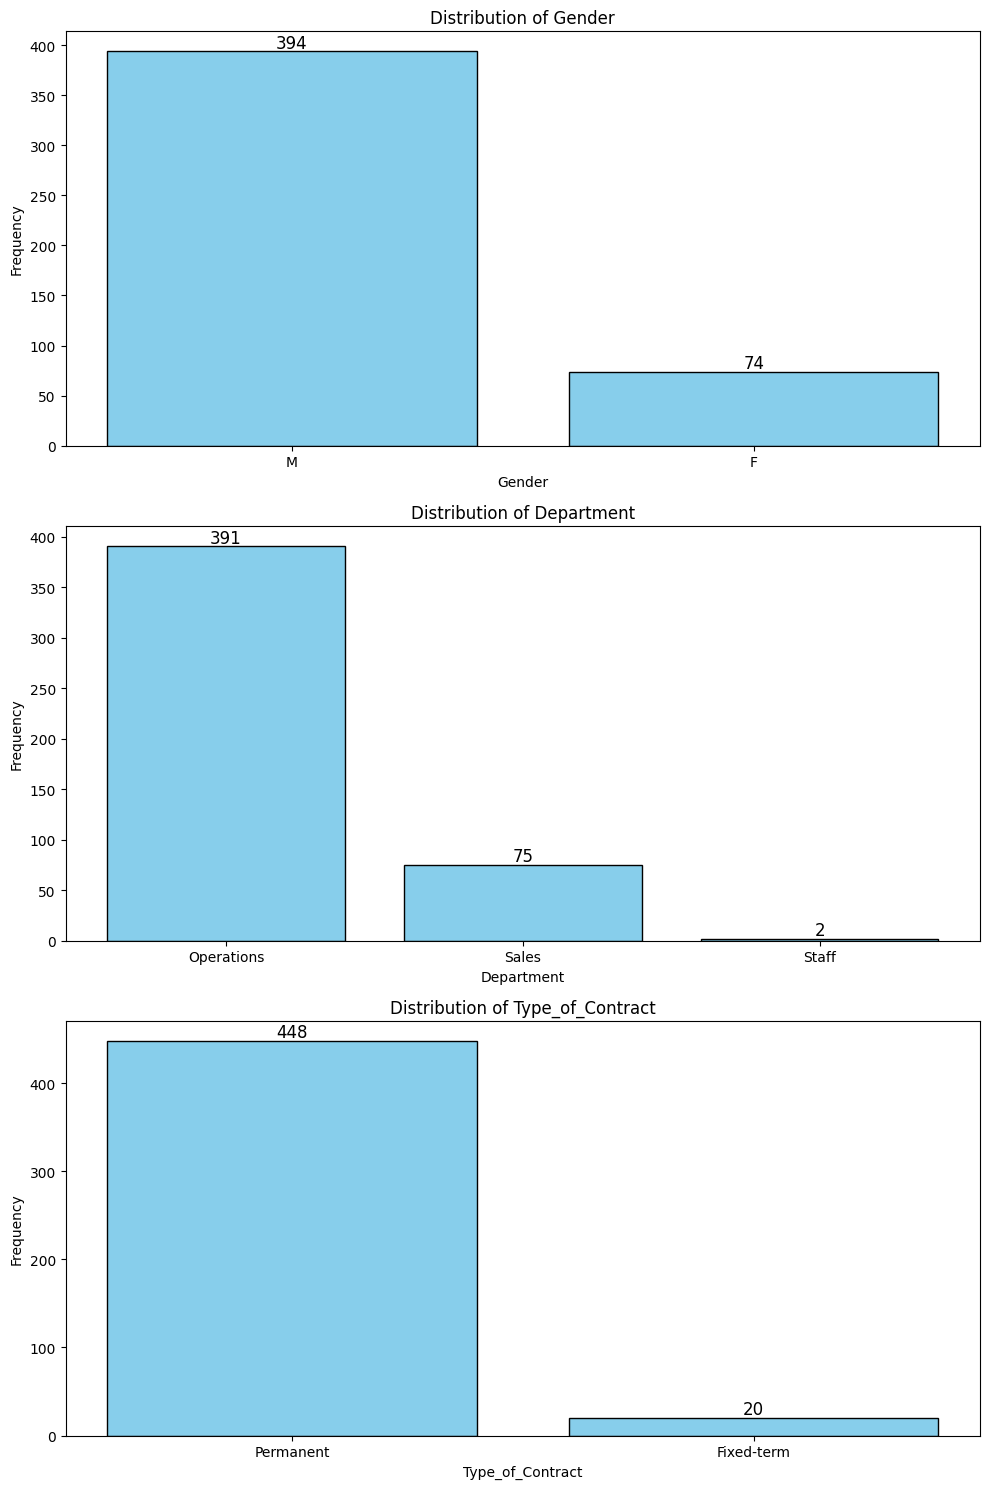

In [11]:
# List of categorical columns
categorical_columns = ['Gender', 'Department', 'Type_of_Contract']

# Layout for the subplots
n_cols = 1
n_rows = len(categorical_columns)

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 15))

# Plot each bar chart in a subplot
for i, column in enumerate(categorical_columns):
    value_counts = df[column].value_counts()
    bars = axes[i].bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='black')

    # Add title and labels
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width() / 2., height - 0.5, f'{int(height)}', ha='center', va='bottom', color='black', fontsize=12)

plt.tight_layout()
plt.show()

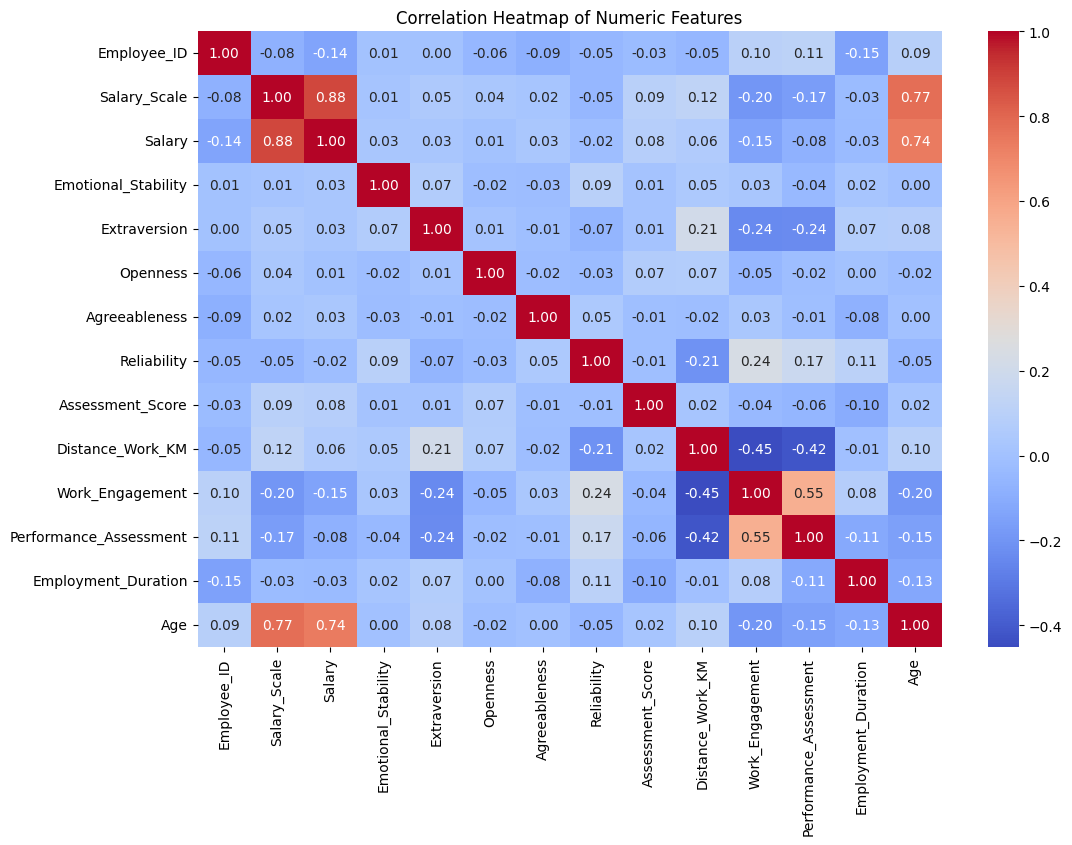

In [12]:
# Select only numeric features
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

**Average Salary by department:**

In [13]:
df.groupby('Department')['Salary'].mean().round(2)

,Salary
Department,
Operations,45353.85
Sales,51591.07
Staff,40905.00


**Average Distance to Work by department:**

In [14]:
df.groupby('Department')['Distance_Work_KM'].mean().round(2)

,Distance_Work_KM
Department,
Operations,26.35
Sales,29.59
Staff,56.50


**Average employment duration by department:**

In [48]:
df.groupby('Department')['Employment_Duration'].mean()

,Employment_Duration
Department,
Operations,34.0
Sales,33.0
Staff,40.5


**Average Age by Department:**

In [16]:
df.groupby('Department')['Age'].mean().round(0).astype(int)

,Age
Department,
Operations,38
Sales,40
Staff,36


**Average Work Engagement by Type of Contract:**

In [17]:
df.groupby('Type_of_Contract')['Work_Engagement'].mean().round(2)

,Work_Engagement
Type_of_Contract,
Fixed-term,2.40
Permanent,3.84


**Distribution of Performance Assessment by Type of Contract:**

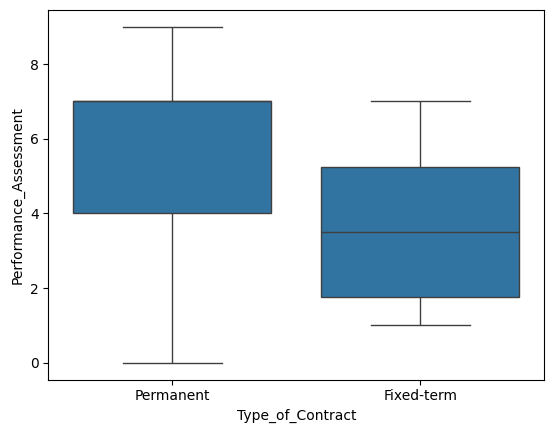

In [18]:
sns.boxplot(x='Type_of_Contract', y='Performance_Assessment', data=df)
plt.show()

**Average Employment Duration by Type of Contract:**

In [19]:
df.groupby('Type_of_Contract')['Employment_Duration'].mean().round(1)

,Employment_Duration
Type_of_Contract,
Fixed-term,27.8
Permanent,34.7


**Average Work Engagement by Gender:**

In [20]:
df.groupby('Gender')['Work_Engagement'].mean().round(2)

,Work_Engagement
Gender,
F,3.97
M,3.74


**Relationship between Work Engagement and Distance to Work:**

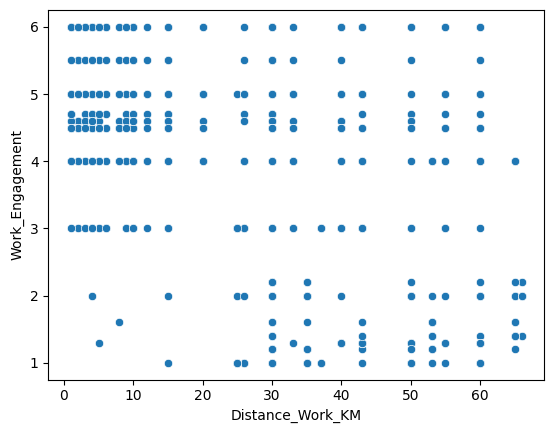

In [21]:
sns.scatterplot(x='Distance_Work_KM', y='Work_Engagement', data=df)
plt.show()

**Relationship between Salary and Employment Duration:**

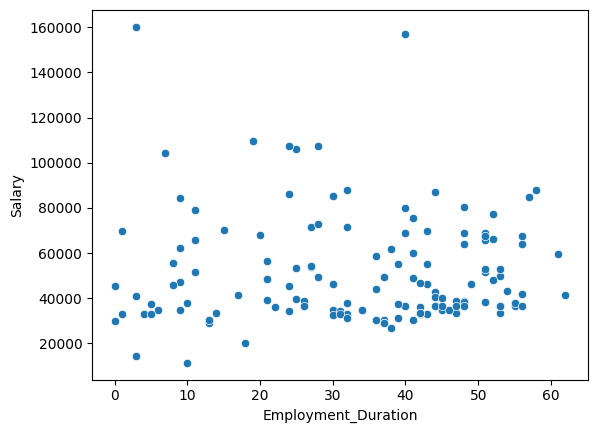

In [22]:
sns.scatterplot(x='Employment_Duration', y='Salary', data=df)
plt.show()

**Relationship between Salary and Age:**

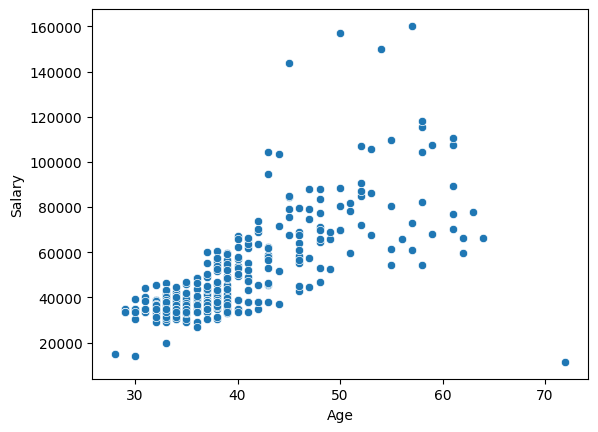

In [23]:
sns.scatterplot(x='Age', y='Salary', data=df)
plt.show()

##Modeling

In [24]:
# Convert dates to datetime format
df['Start_Month'] = pd.to_datetime(df['Start_Month'])
df['Stop_Month'] = pd.to_datetime(df['Stop_Month'])

In [25]:
# Create the target variable 'Will_Leave' (1 if leaving within 12 months, 0 otherwise)
df['Will_Leave'] = ((df['Stop_Month'] <= df['Start_Month'] + pd.DateOffset(months=12)) & (df['Stop_Month'].notna())).astype(int)

# For ongoing employees, set to 0 because they haven't left yet.
df['Will_Leave'] = np.where(df['Stop_Month'].isna(), 0, df['Will_Leave'])

In [26]:
# Count the number of employees with a Stop_Month
num_employees_with_stop_month = df['Stop_Month'].notna().sum()

print(f'Number of employees with a Stop_Month: {num_employees_with_stop_month}')

Number of employees with a Stop_Month: 149


In [27]:
# Filter out employees with a Stop_Month for training and testing
df_train_test = df[df['Stop_Month'].notna()]

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# Define the feature columns and target column
features = ['Gender', 'Department', 'Salary', 'Type_of_Contract',
            'Emotional_Stability', 'Extraversion', 'Openness', 'Agreeableness', 'Reliability',
            'Assessment_Score', 'Distance_Work_KM', 'Work_Engagement', 'Performance_Assessment', 'Age']
target = 'Will_Leave'

X = df_train_test[features]
y = df_train_test[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the numeric and categorical features
categorical_features = ['Gender', 'Department', 'Type_of_Contract']
numeric_features = ['Salary', 'Emotional_Stability', 'Extraversion',
                    'Openness', 'Agreeableness', 'Reliability', 'Assessment_Score',
                    'Distance_Work_KM', 'Work_Engagement', 'Performance_Assessment', 'Age']

# Preprocessing for numerical data: Impute and scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data: Impute and encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Apply the preprocessing to the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# Check the distribution after SMOTE
print("Before SMOTE:")
print(y_train.value_counts())
print("\nAfter SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# Define the pipeline with the classifier
pipeline = Pipeline(steps=[('classifier', RandomForestClassifier(random_state=42))])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Evaluate the model on the test data
X_test_preprocessed = preprocessor.transform(X_test)
y_pred = best_rf_model.predict(X_test_preprocessed)

# Print the classification report
print(classification_report(y_test, y_pred))

Before SMOTE:
Will_Leave
0    89
1    15
Name: count, dtype: int64

After SMOTE:
Will_Leave
0    89
1    89
Name: count, dtype: int64
Fitting 5 folds for each of 48 candidates, totalling 240 fits
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        37
           1       0.50      0.12      0.20         8

    accuracy                           0.82        45
   macro avg       0.67      0.55      0.55        45
weighted avg       0.78      0.82      0.78        45



Feature Importances:
Performance_Assessment: 0.1616
Age: 0.1327
Openness: 0.0975
Distance_Work_KM: 0.0651
Reliability: 0.0635
Extraversion: 0.0626
Assessment_Score: 0.0568
Agreeableness: 0.0556
Emotional_Stability: 0.0554
Type_of_Contract_Permanent: 0.0529
Salary: 0.0486
Type_of_Contract_Fixed-term: 0.0461
Work_Engagement: 0.0301
Department_Operations: 0.0249
Department_Sales: 0.0218
Gender_F: 0.0128
Gender_M: 0.0121
Department_Staff: 0.0000


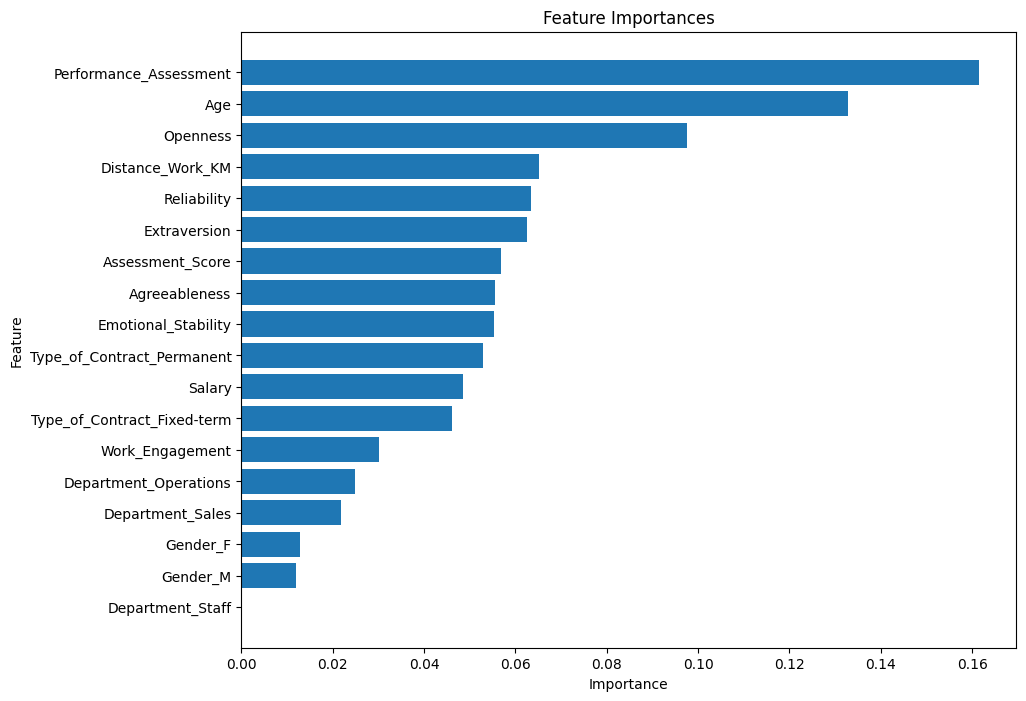

In [29]:
import matplotlib.pyplot as plt

# Get the feature importances from the best model
feature_importances = best_rf_model.named_steps['classifier'].feature_importances_

# Get numerical feature names
numeric_feature_names = numeric_features

# Get categorical feature names
categorical_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

# Combine the numerical and categorical feature names
all_feature_names = np.concatenate([numeric_feature_names, categorical_feature_names])

# Combine the feature importances with their corresponding feature names
feature_importance_dict = dict(zip(all_feature_names, feature_importances))

# Sort the features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the feature importances
print("Feature Importances:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh([feature for feature, _ in sorted_features], [importance for _, importance in sorted_features])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


In [30]:
# Count the number of samples in each set
num_train_samples = X_train_resampled.shape[0]
num_test_samples = X_test.shape[0]

print(f'Number of employees in the training set: {num_train_samples}')
print(f'Number of employees in the test set: {num_test_samples}')

Number of employees in the training set: 178
Number of employees in the test set: 45


In [31]:
# Check the distribution of the target variable in the training set
print("Training set distribution:")
print(y_train.value_counts())

# Optionally, check the distribution in the test set as well
print("\nTest set distribution:")
print(y_test.value_counts())

Training set distribution:
Will_Leave
0    89
1    15
Name: count, dtype: int64

Test set distribution:
Will_Leave
0    37
1     8
Name: count, dtype: int64


In [32]:
# Count the number of employees without a Stop_Month
num_employees_without_stop_month = df['Stop_Month'].isna().sum()

print(f'Number of employees without a Stop_Month: {num_employees_without_stop_month}')

Number of employees without a Stop_Month: 319


In [33]:
# Reference date
reference_date = pd.to_datetime('2020-08-01')

# Filter the dataset for employees still working on 1 August 2020
df_august_2020 = df[(df['Start_Month'] <= reference_date) & (df['Stop_Month'].isna())]

# Extract features for prediction
X_august_2020 = df_august_2020[features]

# Make predictions on the filtered dataset using the best model
predictions = best_rf_model.predict(preprocessor.transform(X_august_2020))

# Add predictions to the original dataframe
df_august_2020['Predictions'] = predictions

# Display predictions
print(df_august_2020[['Employee_ID', 'Predictions']])

     Employee_ID  Predictions
20       1010286            0
27       1010303            0
30       1010307            0
33       1010311            0
36       1010316            0
..           ...          ...
462      1011721            0
463      1011722            0
464      1011723            0
465      1011724            0
466      1011725            0

[319 rows x 2 columns]


<ipython-input-33-576e1b5e2f85>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_august_2020['Predictions'] = predictions


In [34]:
# Count the number of employees predicted to leave within 12 months
num_predicted_to_leave = df_august_2020['Predictions'].sum()

print(f'Number of employees predicted to leave within 12 months: {num_predicted_to_leave}')

Number of employees predicted to leave within 12 months: 0


In [35]:
# Transform the features using the preprocessor
X_august_2020_preprocessed = preprocessor.transform(X_august_2020)

# Get probability estimates using the best model
probabilities = best_rf_model.predict_proba(X_august_2020_preprocessed)

# Extract the probability of leaving (class 1)
prob_leave = probabilities[:, 1]

# Add predictions and probabilities to the original DataFrame
df_august_2020['Predictions'] = best_rf_model.predict(X_august_2020_preprocessed)
df_august_2020['Probability_of_Leaving'] = prob_leave

# Display results
print(df_august_2020[['Employee_ID', 'Predictions', 'Probability_of_Leaving']])

     Employee_ID  Predictions  Probability_of_Leaving
20       1010286            0                0.264167
27       1010303            0                0.137417
30       1010307            0                0.283750
33       1010311            0                0.203333
36       1010316            0                0.134083
..           ...          ...                     ...
462      1011721            0                0.089167
463      1011722            0                0.030833
464      1011723            0                0.045833
465      1011724            0                0.101667
466      1011725            0                0.120000

[319 rows x 3 columns]


<ipython-input-35-2c77427697c4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_august_2020['Predictions'] = best_rf_model.predict(X_august_2020_preprocessed)
<ipython-input-35-2c77427697c4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_august_2020['Probability_of_Leaving'] = prob_leave


In [36]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedBaggingClassifier

# Define the feature columns and target column
features = ['Gender', 'Department', 'Salary', 'Type_of_Contract',
            'Emotional_Stability', 'Extraversion', 'Openness', 'Agreeableness', 'Reliability',
            'Assessment_Score', 'Distance_Work_KM', 'Work_Engagement', 'Performance_Assessment', 'Age']
target = 'Will_Leave'

X = df_train_test[features]
y = df_train_test[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the numeric and categorical features
categorical_features = ['Gender', 'Department', 'Type_of_Contract']
numeric_features = ['Salary', 'Emotional_Stability', 'Extraversion',
                    'Openness', 'Agreeableness', 'Reliability', 'Assessment_Score',
                    'Distance_Work_KM', 'Work_Engagement', 'Performance_Assessment', 'Age']

# Preprocessing for numerical data: Impute and scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data: Impute and encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Apply the preprocessing to the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Initialize Balanced Bagging with Random Forest as the base estimator
balanced_bagging = BalancedBaggingClassifier(
    estimator=RandomForestClassifier(random_state=42),
    sampling_strategy='auto',
    replacement=False,
    random_state=42,
    n_jobs=-1
)

# Define the pipeline with the classifier
pipeline = Pipeline(steps=[('classifier', balanced_bagging)])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'classifier__estimator__n_estimators': [100, 200],
    'classifier__estimator__max_depth': [10, 20, None],
    'classifier__estimator__min_samples_split': [2, 5],
    'classifier__estimator__min_samples_leaf': [1, 2],
    'classifier__estimator__bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_preprocessed, y_train)

# Best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Evaluate the model on the test data
y_pred = best_rf_model.predict(X_test_preprocessed)

# Print the classification report
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
              precision    recall  f1-score   support

           0       0.82      0.76      0.79        37
           1       0.18      0.25      0.21         8

    accuracy                           0.67        45
   macro avg       0.50      0.50      0.50        45
weighted avg       0.71      0.67      0.69        45



In [37]:
# Reference date
reference_date = pd.to_datetime('2020-08-01')

# Filter the dataset for employees still working on 1 August 2020
df_august_2020 = df[(df['Start_Month'] <= reference_date) & (df['Stop_Month'].isna())]

# Extract features for prediction
X_august_2020 = df_august_2020[features]

# Make predictions on the filtered dataset using the best model
predictions = best_rf_model.predict(preprocessor.transform(X_august_2020))

# Add predictions to the original dataframe
df_august_2020['Predictions'] = predictions

<ipython-input-37-24a869095837>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_august_2020['Predictions'] = predictions


In [38]:
# Count the number of employees predicted to leave within 12 months
num_predicted_to_leave = df_august_2020['Predictions'].sum()

print(f'Number of employees predicted to leave within 12 months: {num_predicted_to_leave}')

Number of employees predicted to leave within 12 months: 30


In [39]:
# Transform the features using the preprocessor
X_august_2020_preprocessed = preprocessor.transform(X_august_2020)

# Get probability estimates using the best model
probabilities = best_rf_model.predict_proba(X_august_2020_preprocessed)

# Extract the probability of leaving (class 1)
prob_leave = probabilities[:, 1]

# Add predictions and probabilities to the original DataFrame
df_august_2020['Predictions'] = best_rf_model.predict(X_august_2020_preprocessed)
df_august_2020['Probability_of_Leaving'] = prob_leave

# Display results
print(df_august_2020[['Employee_ID', 'Predictions', 'Probability_of_Leaving']])

     Employee_ID  Predictions  Probability_of_Leaving
20       1010286            0                0.334540
27       1010303            0                0.340340
30       1010307            0                0.443399
33       1010311            0                0.377823
36       1010316            0                0.300182
..           ...          ...                     ...
462      1011721            0                0.273799
463      1011722            0                0.242166
464      1011723            0                0.256916
465      1011724            0                0.330832
466      1011725            0                0.402109

[319 rows x 3 columns]


<ipython-input-39-2c77427697c4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_august_2020['Predictions'] = best_rf_model.predict(X_august_2020_preprocessed)
<ipython-input-39-2c77427697c4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_august_2020['Probability_of_Leaving'] = prob_leave


In [40]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedBaggingClassifier

# Define the feature columns and target column
features = ['Gender', 'Department', 'Salary', 'Type_of_Contract',
            'Emotional_Stability', 'Extraversion', 'Openness', 'Agreeableness', 'Reliability',
            'Assessment_Score', 'Distance_Work_KM', 'Work_Engagement', 'Performance_Assessment', 'Age']
target = 'Will_Leave'

X = df_train_test[features]
y = df_train_test[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Define the numeric and categorical features
categorical_features = ['Gender', 'Department', 'Type_of_Contract']
numeric_features = ['Salary', 'Emotional_Stability', 'Extraversion',
                    'Openness', 'Agreeableness', 'Reliability', 'Assessment_Score',
                    'Distance_Work_KM', 'Work_Engagement', 'Performance_Assessment', 'Age']

# Preprocessing for numerical data: Impute and scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handling missing values if any
    ('scaler', StandardScaler())])

# Preprocessing for categorical data: Impute and encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handling missing values if any
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Apply the preprocessing to the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Initialize Balanced Bagging with Random Forest as the base estimator
balanced_bagging = BalancedBaggingClassifier(
    estimator=RandomForestClassifier(random_state=42),
    sampling_strategy='auto',
    replacement=False,
    random_state=42,
    n_jobs=-1
)

# Define the pipeline with the classifier
pipeline = Pipeline(steps=[('classifier', balanced_bagging)])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'classifier__estimator__n_estimators': [100, 200],
    'classifier__estimator__max_depth': [10, 20, None],
    'classifier__estimator__min_samples_split': [2, 5],
    'classifier__estimator__min_samples_leaf': [1, 2],
    'classifier__estimator__bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_preprocessed, y_train)

# Best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Evaluate the model on the test data
y_pred = best_rf_model.predict(X_test_preprocessed)

# Print the classification report
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        50
           1       0.33      0.50      0.40        10

    accuracy                           0.75        60
   macro avg       0.61      0.65      0.62        60
weighted avg       0.80      0.75      0.77        60



In [41]:
# Check the distribution of the target variable in the training set
print("Training set distribution:")
print(y_train.value_counts())

# Optionally, check the distribution in the test set as well
print("\nTest set distribution:")
print(y_test.value_counts())

Training set distribution:
Will_Leave
0    76
1    13
Name: count, dtype: int64

Test set distribution:
Will_Leave
0    50
1    10
Name: count, dtype: int64


In [42]:
# Reference date
reference_date = pd.to_datetime('2020-08-01')

# Filter the dataset for employees still working on 1 August 2020
df_august_2020 = df[(df['Start_Month'] <= reference_date) & (df['Stop_Month'].isna())]

# Extract features for prediction
X_august_2020 = df_august_2020[features]

# Make predictions on the filtered dataset using the best model
predictions = best_rf_model.predict(preprocessor.transform(X_august_2020))

# Add predictions to the original dataframe
df_august_2020['Predictions'] = predictions

<ipython-input-42-24a869095837>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_august_2020['Predictions'] = predictions


In [43]:
# Count the number of employees predicted to leave within 12 months
num_predicted_to_leave = df_august_2020['Predictions'].sum()

print(f'Number of employees predicted to leave within 12 months: {num_predicted_to_leave}')

Number of employees predicted to leave within 12 months: 19


In [47]:
# Transform the features using the preprocessor
X_august_2020_preprocessed = preprocessor.transform(X_august_2020)

# Get probability estimates using the best model
probabilities = best_rf_model.predict_proba(X_august_2020_preprocessed)

# Extract the probability of leaving (class 1)
prob_leave = probabilities[:, 1]

# Add predictions and probabilities to the original DataFrame
df_august_2020['Predictions'] = best_rf_model.predict(X_august_2020_preprocessed)
df_august_2020['Probability_of_Leaving'] = prob_leave

<ipython-input-47-972acd5572be>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_august_2020['Predictions'] = best_rf_model.predict(X_august_2020_preprocessed)
<ipython-input-47-972acd5572be>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_august_2020['Probability_of_Leaving'] = prob_leave


In [45]:
df_august_2020[['Employee_ID', 'Predictions', 'Probability_of_Leaving']].head()

,Employee_ID,Predictions,Probability_of_Leaving
20,1010286,0,0.358573
27,1010303,0,0.392242
30,1010307,0,0.397422
33,1010311,0,0.391850
36,1010316,0,0.299859


In [46]:
# Specify the filename and sheet name
output_filename = 'august_2020_predictions.xlsx'
sheet_name = 'Predictions'

# Save the DataFrame to an Excel file
df_august_2020.to_excel(output_filename, sheet_name=sheet_name, index=False)

print(f"DataFrame has been saved to {output_filename}")

DataFrame has been saved to august_2020_predictions.xlsx
